# 01 Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/renubalaji/Documents/CareerFoundry/Python/Instacart Basket Analysis'

In [5]:
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [23]:
cust_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
user_id,,,,,,,,,,,,,,,,,,,,,
1,196,Soda,77,7,9.0,2539329,prior,1,2,8,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,2398795,prior,2,3,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,473747,prior,3,3,12,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,2254736,prior,4,4,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,431534,prior,5,4,15,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 02  Creating a histogram

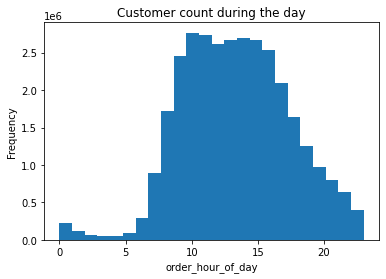

In [7]:
# Adding labels and title
plt.xlabel('order_hour_of_day')
plt.ylabel('Number of cutomers')
plt.title('Customer count during the day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

hist = cust_ords_prods ['order_hour_of_day'].plot.hist(bins = 24)

This histogram indicates a peak in orders at 10:00 all the way till 15:00 after which the frequency of order reduces.

# 03 Creating a bar chart

<AxesSubplot:title={'center':'Customer count during the day'}, xlabel='order_hour_of_day', ylabel='Number of cutomers'>

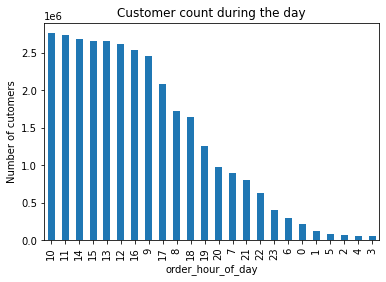

In [8]:
# Adding labels and title
plt.xlabel('order_hour_of_day')
plt.ylabel('Number of cutomers')
plt.title('Customer count during the day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
cust_ords_prods ['order_hour_of_day']. value_counts(). plot.bar()

The bar chart also indicates that the highest frequency of orders is at 10:00 and the lowest order frequency is at 03:00. 

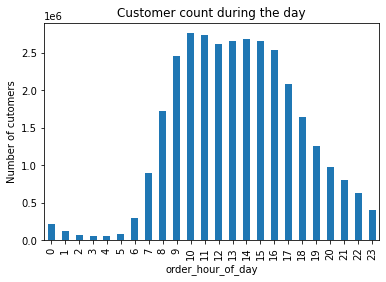

In [9]:
# Adding labels and title
plt.xlabel('order_hour_of_day')
plt.ylabel('Number of cutomers')
plt.title('Customer count during the day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = cust_ords_prods ['order_hour_of_day']. value_counts().sort_index().plot.bar()

This bar chart is similar to the histogram visualised.

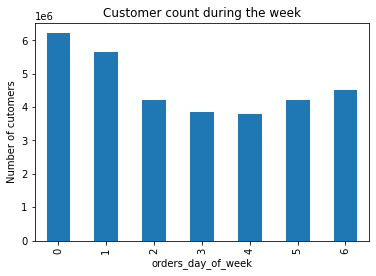

In [24]:
# Adding labels and title
plt.xlabel('orders_day_of_week')
plt.ylabel('Number of cutomers')
plt.title('Customer count during the week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar = cust_ords_prods ['orders_day_of_week']. value_counts().sort_index().plot.bar()

In [27]:
cust_ords_prods.describe

<bound method NDFrame.describe of          product_id                                      product_name  \
user_id                                                                 
1               196                                              Soda   
1               196                                              Soda   
1               196                                              Soda   
1               196                                              Soda   
1               196                                              Soda   
...             ...                                               ...   
99999         47526                                   Goat Cheese Log   
99999         48628                         Organic Whole Wheat Bread   
99999         48628                         Organic Whole Wheat Bread   
99999         48628                         Organic Whole Wheat Bread   
99999         49174  Raincoast Crisps Cranberry And Hazelnut Crackers   

         aisle_i

# Creating a bar chart for the loyalty flag 

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

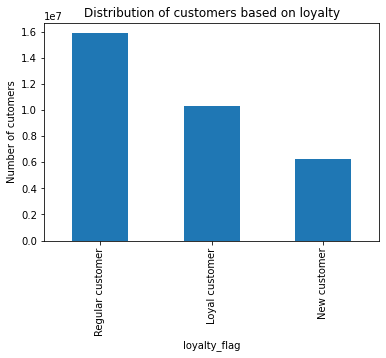

In [10]:
# Adding labels and title
plt.xlabel('loyalty_flag')
plt.ylabel('Number of cutomers')
plt.title('Distribution of customers based on loyalty')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

bar_2 = cust_ords_prods ['loyalty_flag'].value_counts().plot.bar()

In [11]:
x_data = ['order_id']
y_data = ['loyalty_flag']

In [12]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [13]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_2'))

# 04 Creating a line chart

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [14]:
# Create a random sample by generating a seed
np.random.seed(4)

In [15]:
dev = np.random.rand (len(cust_ords_prods)) <= 0.7

In [16]:
dev

array([False,  True, False, ..., False,  True,  True])

In [17]:
#Split dataframe into big and small
big = cust_ords_prods [dev]
small = cust_ords_prods [~dev]

In [18]:
len (cust_ords_prods)

32434212

In [19]:
len(big)+ len(small)

32434212

In [20]:
# Check if the subset of the sample was made properly
cust_ords_prods_2 = small [['prices' ,'order_hour_of_day']]

In [21]:
# Check if the subset of the sample was made properly
cust_ords_prods_2.head(5)

,prices,order_hour_of_day
user_id,,
1,9.0,8
1,9.0,12
1,9.0,7
1,9.0,9
1,3.0,7


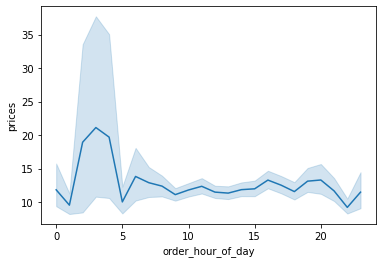

In [51]:
# Create a line chart

line = sns.lineplot(data = cust_ords_prods_2, x = 'order_hour_of_day',y = 'prices')

6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [26]:
cust_ords_prods.head(5)


,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
user_id,,,,,,,,,,,,,,,,,,,,,
1,196,Soda,77,7,9.0,2539329,prior,1,2,8,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,2398795,prior,2,3,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,473747,prior,3,3,12,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,2254736,prior,4,4,7,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,196,Soda,77,7,9.0,431534,prior,5,4,15,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
cust_ords_prods.rename(columns = {'Age' : 'age'}, inplace = True)

In [20]:
# Reduce previously made sample to only the columns needed
cust_ords_prods_3 = small [['age','n_dependants']]

In [21]:
cust_ords_prods_3.head(5)

,age,n_dependants
user_id,,
1,31,3
1,31,3
1,31,3
1,31,3
1,31,3


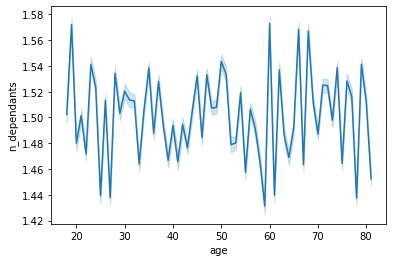

In [23]:
# Create a line chart
line_2 = sns.lineplot(data = cust_ords_prods_3, x = 'age',y = 'n_dependants')

There is no significant pattern that can be visible between the age and the number of dependants since the graph peaks and falls randomly. Therefore, we cannot provide any conclusion regarding this relation. 

# 05 Creating a Scatterplot
7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [28]:
cust_ords_prods_4 = small [['age','income']]

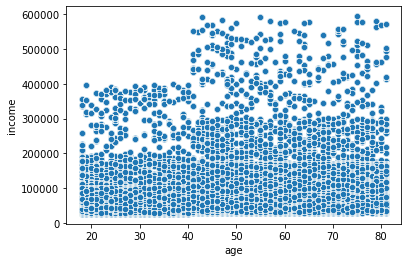

In [55]:
scatterplt = sns.scatterplot(x= 'age', y= 'income', data = cust_ords_prods_4)

Ages below 40 tend to have lower incomes concentrated at the bottom of the chart whereas, the age group above 40 till 80 tend to have higher incomes. 

# 09 Exporting the visualisations

In [37]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [38]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_hour_of_day.png'))

In [42]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag'))

In [52]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day_prices'))

In [53]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants'))

In [57]:
scatterplt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income'))